In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata , study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

mouse_count = mouse_study_data['Mouse ID'].nunique()

mouse_count


249

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = (mouse_study_data.drop_duplicates())
clean_data 
# mouse_study_data.drop_duplicates()
# mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
clean_data_count = clean_data['Mouse ID'].nunique()

clean_data_count

249

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



tumor_mean = mouse_study_data.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
tumor_median = mouse_study_data.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)']
tumor_variance  = mouse_study_data.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
tumor_sdv = mouse_study_data.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
tumor_err = mouse_study_data.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)']

tumor_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance":tumor_variance,
                                 "Tumor Volume std ":tumor_sdv, "Tumor Volume std, err":tumor_err })
tumor_summary 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume std,"Tumor Volume std, err"
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:xlabel='Drug Regimen'>

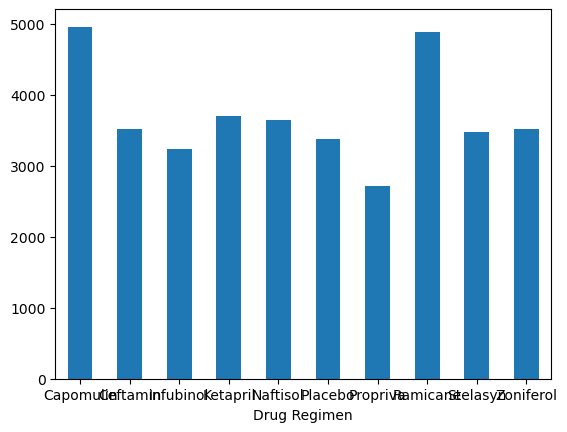

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_regimen = clean_data.groupby(["Drug Regimen"]).sum()['Timepoint']
total_regimen.plot.bar(y='Timepoint', x='Drug Regimen',rot=0)



Text(0, 0.5, 'Total')

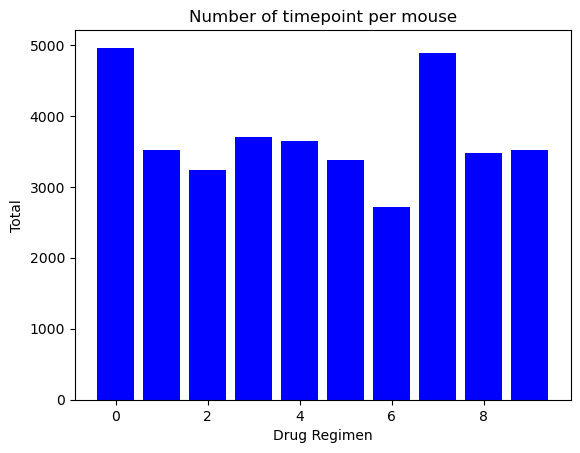

In [8]:
#A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot is generated.
# Create a bar chart based upon the above data
x_axis = np.arange(len(total_regimen))
plt.bar(x_axis, total_regimen, color="b", align="center")

# Create the ticks for our bar chart's x axis
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, 'Drug Regimen')

#  Give the chart a title, x label, and y label
plt.title("Number of timepoint per mouse")
plt.xlabel("Drug Regimen")
plt.ylabel("Total")

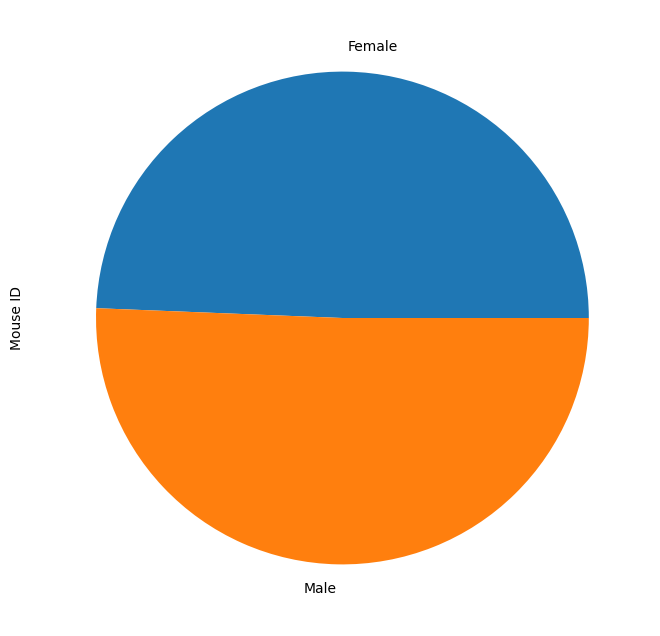

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_data.groupby(["Sex"]).count()['Mouse ID']
sex_count
sex_count.plot(kind='pie', subplots=True, figsize=(8, 8))
# plt.pie(labels = sex_count["Sex"])
plt.show()

(-1.1183816489819711,
 1.1071412960659854,
 -1.1143924872882185,
 1.108316575380457)

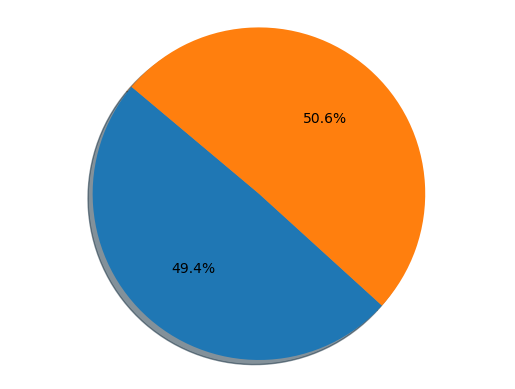

In [10]:
 #Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')

In [13]:
#A DatFrame that has the last timepoint for each mouse ID is created using
last_timepoint = clean_data.groupby(["Mouse ID"]).max()['Timepoint']
last_timepoint_volume = pd.merge(clean_data , last_timepoint, how="left", on=["Mouse ID", "Mouse ID"])
# last_timepoint_volume_2 = last_timepoint_volume.loc[([last_timepoint_volume["Drug Regimen"] == 'Ramicane']) & (last_timepoint_volume["Drug Regimen"] == 'Capomulin')]
# last_timepoint_volume_2.head()
last_timepoint_volume 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,45
1888,z969,Naftisol,Male,9,30,30,65.841013,3,45
1889,z969,Naftisol,Male,9,30,35,69.176246,4,45
1890,z969,Naftisol,Male,9,30,40,70.314904,4,45


#Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

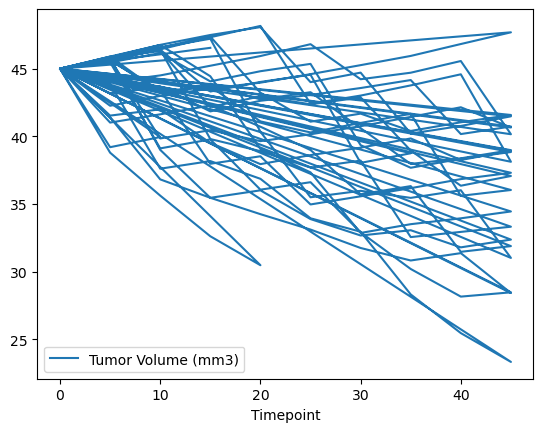

In [12]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_data[['Drug Regimen','Timepoint','Tumor Volume (mm3)']]
capomulin = capomulin.loc[capomulin["Drug Regimen"] == 'Capomulin']
capomulin
capomulin.plot.line(x='Timepoint', y='Tumor Volume (mm3)' )


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter()

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen